In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

import tensorflow as tf


Manually

In [ ]:

#Data
#H = np.array([[147, 150, 153, 158, 163, 168, 170, 173, 175, 178, 180, 183]]).T
#W = np.array([[49, 50, 51, 54, 58, 60, 62, 63, 64, 66, 67, 68]]).T
H = np.array([[-5. , -4.5, -4. , -3.5, -3. , -2.5, -2. , -1.5, -1. , -0.5,  0. , 0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5]])
#W = np.array([[25.40729498, 25.29574425, 23.90521496, 20.30689771, 19.39317867, 13.14535337, 17.45262087,  9.96358651, 14.85946008, 11.07613586, 10.84981277,  9.82826791,  8.5280891 ,  1.5692666 ,  2.43431479, -0.92917028, -0.33752305, -2.52360409, -6.00860186, -5.92781816]])
W = np.array([[25.4, 25.2, 23.9, 20.3, 19.3, 13.1, 17.4,  9.9, 14.8, 11.0, 10.8,  9.8,  8.5 ,  1.5 ,  2.4, -0.9, -0.3, -2.5, -6.0, -5.9]])

#Build Linear Regression Manually
Xbar = np.concatenate((np.ones((H.shape[0], 1)), H), axis = 1) #12 2
A = Xbar.T@Xbar
b = Xbar.T@W
w = np.linalg.pinv(A)@b

#Init LR line
x0 = np.linspace(-6, 6, 10)
#x0 = np.linspace(140, 190, 20)
y0 = w[0][0] + x0*w[1][0]

print(w[0][0])
print(w[1][0])

plt.plot(x0, y0, marker = 'o')
plt.plot(H.T, W.T, 'ro')
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

Skit

In [ ]:

#Data
H = np.array([[147, 150, 153, 158, 163, 168, 170, 173, 175, 178, 180, 183]]).T
W = np.array([[49, 50, 51, 54, 58, 60, 62, 63, 64, 66, 67, 68]]).T
Xbar = np.concatenate((np.ones((H.shape[0], 1)), H), axis = 1) #12 2

reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xbar, W)
coe = reg.coef_
x0 = np.linspace(145, 185, 2)
y0 = coe[0][0] + x0*coe[0][1]

print(coe[0])
plt.plot(x0, y0, marker = 'o')
plt.plot(H.T, W.T, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

In [ ]:
H = np.array([[147, 150, 153, 158, 163, 168, 170, 173, 175, 178, 180, 183]]).T # (12,1)
W = np.array([[49, 50, 51, 54, 58, 60, 62, 63, 64, 66, 67, 68]]).T # (12,1)

weight = tf.Variable(tf.convert_to_tensor(np.array([30, 1])))
training_ephoch = 100
lr = 0.001
for i in range (ephoch):
    with tf.GradientTape() as g:
        y = tf.add(tf.multiply(W[0], H), W[1])
        #loss = tf.keras.losses.MSE(y, W)
        #loss = tf.Variable(((weight[0]*H + weight[1]) * (weight[0]*H + weight[1]) - W)/2)
        loss = tf.reduce_sum(tf.pow(y-W, 2)) / (2 * 12)
    weight.assign_sub(lr*g.gradient(loss, weight))
print(weight)

x0 = np.linspace(145, 185, 2)
y0 = x0*weight[0][0] + x0*weight[0][1]

plt.plot(x0, y0, marker = 'o')
plt.plot(H.T, W.T, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')
plt.show()

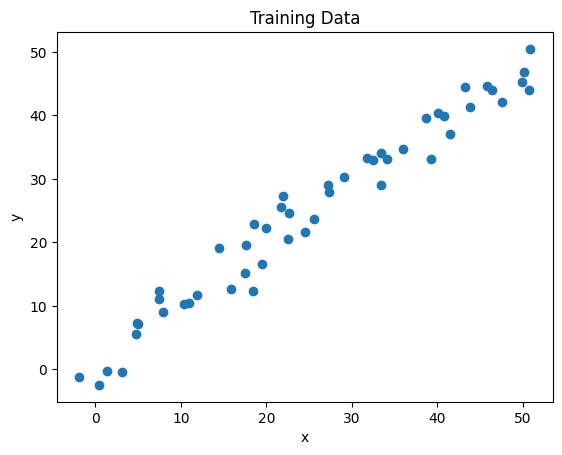

RuntimeError: tf.placeholder() is not compatible with eager execution.

In [4]:
   
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)
 
# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)
 
n = len(x) # Number of data points
   
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()
   
X = tf.compat.v1.placeholder("float")
Y = tf.compat.v1.placeholder("float")
   
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")
   
learning_rate = 0.01
training_epochs = 1000
   
# Hypothesis
y_pred = tf.add(tf.multiply(X, W), b)
 
# Mean Squared Error Cost Function
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * n)
 
# Gradient Descent Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
 
# Global Variables Initializer
init = tf.global_variables_initializer()

# Starting the Tensorflow Session
with tf.Session() as sess:
     
    # Initializing the Variables
    sess.run(init)
     
    # Iterating through all the epochs
    for epoch in range(training_epochs):
         
        # Feeding each data point into the optimizer using Feed Dictionary
        for (_x, _y) in zip(x, y):
            sess.run(optimizer, feed_dict = {X : _x, Y : _y})
         
        # Displaying the result after every 50 epochs
        if (epoch + 1) % 50 == 0:
            # Calculating the cost a every epoch
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    # Storing necessary values to be used outside the Session
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

       
# Calculating the predictions
predictions = weight * x + bias
print("Training cost =", training_cost, "Weight =", weight, "bias =", bias, '\n')

  
# Plotting the Results
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()